In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
team_1=pd.read_csv("./teams_data/team_1.csv")

/home/kaypee/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,8,9,13,14,15,18,21,25,26,29,30,33,34,37,38,39,40,44,45,47,48,49,69,70,71,72,73,74,75,76,77,78,98,100,101,102,103,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
team_1=team_1.drop(columns=['Unnamed: 0'])

In [4]:
team_1=team_1.astype("float32")

In [5]:
team_1=team_1.fillna(0)

In [6]:
team_1.describe()

,%Juice,%time,Acid,AssimLight,Bite,BlackScr,CO2_cons,CO2air,Cum_irr,Cum_trusses,...,t_slab1,t_slab2,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
count,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,...,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000,95849.000000
mean,66.999329,43898.011719,14.499855,24.284031,219.002930,22.339409,0.005573,381.279877,0.964462,1.299367,...,10.532413,10.685124,4.785684,11.281489,11.284800,8.040073,87.243042,409.348450,0.009248,0.596985
std,0.086428,47.919296,0.018736,42.878338,0.568691,39.911137,0.002535,405.961426,1.680405,0.187602,...,11.140795,11.302405,9.395140,11.476177,11.479919,14.004575,392.613464,666.034729,0.106046,0.600190
min,51.000000,43815.000000,10.700000,0.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,43856.515625,14.500000,0.000000,219.000000,0.000000,0.005477,0.000000,0.000000,1.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,43898.015625,14.500000,0.000000,219.000000,0.000000,0.005477,0.000000,0.000000,1.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,43939.507812,14.500000,0.000000,219.000000,0.000000,0.005477,757.000000,1.700000,1.300000,...,21.900000,22.200001,0.000000,22.299999,22.299999,14.000000,0.000000,1440.000000,0.000000,1.200000
max,67.000000,43981.000000,14.500000,100.000000,334.000000,100.000000,0.132742,2000.000000,34.400002,22.000000,...,28.299999,28.100000,28.000000,28.000000,28.000000,287.000000,2000.000000,2000.000000,4.000000,4.000000


In [7]:

teams = ["Digilog","AICU","IUACAAS","Automatoes","TheAutomators"]
datasets = ["GreenhouseClimate.csv","Production.csv","TomQuality.csv","CropParameters.csv"]

df_raw = []
df_teams  = []
i = 0
for i in range(len(teams)):
    df_raw.append([])
    for data in datasets:
        df_tmp = pd.read_csv("datasets/{}/{}".format(teams[i],data))
        df_tmp = df_tmp.rename(columns={"%Time":"%time","%Time ":"%time"}) # rename Time col to have the same name "%time"
        df_raw[i].append(df_tmp)
    
    df_team = pd.concat(df_raw[i],sort=True,ignore_index=True)  # merge all the datasets
    df_team = df_team.fillna(method="bfill")  # bfill all na fields
    df_team = df_team.fillna(method="ffill")  # ffill all the rest of the fields
    df_team=df_team.astype("float32")
    df_team = df_team.fillna(0)  # ffill all the rest of the fields
    
    
    # TODO: ffill the values after bfill 
    
    df_teams.append(df_team)


/home/kaypee/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
pd.read_csv("datasets/AICU/TomQuality.csv").columns,pd.read_csv("datasets/AICU/CropParameters.csv").columns

(Index(['%time', 'Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
        'DMC_fruit'],
       dtype='object'),
 Index(['%Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
        'plant_dens'],
       dtype='object'))

In [9]:
df_teams[0].shape,df_teams[0].columns

((47863, 70),
 Index(['%Juice', '%time', 'Acid', 'AssimLight', 'Bite', 'BlackScr', 'CO2air',
        'Cum_irr', 'Cum_trusses', 'DMC_fruit', 'EC_drain_PC', 'EnScr',
        'Flavour ', 'HumDef', 'Nr_fruits_ClassA', 'Nr_fruits_ClassB',
        'PipeGrow', 'PipeLow', 'ProdA', 'ProdB', 'Rhair', 'Stem_elong',
        'Stem_thick', 'TSS', 'Tair', 'Tot_PAR', 'Tot_PAR_Lamps',
        'Truss development time ', 'VentLee', 'Ventwind', 'Weight',
        'Weight_fruits_ClassA', 'Weight_fruits_ClassB', 'assim_sp', 'assim_vip',
        'avg_nr_harvested_trusses', 'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp',
        'dx_vip', 'int_blue_sp', 'int_blue_vip', 'int_farred_sp',
        'int_farred_vip', 'int_red_sp', 'int_red_vip', 'int_white_sp',
        'int_white_vip', 'pH_drain_PC', 'plant_dens', 'scr_blck_sp',
        'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip', 'stem_dens ',
        't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
        't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't

In [10]:
# list of observation, action and reward columns 
observation_cols = ['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup','ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB','Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
        'DMC_fruit','Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
        'plant_dens']

setpoint_columns = ["assim_sp","co2_sp","dx_sp","int_blue_sp","int_farred_sp", \
        "int_red_sp","int_white_sp","scr_blck_sp","scr_enrg_sp","t_grow_min_sp",\
        "t_heat_sp","t_rail_min_sp","t_vent_sp","water_sup_intervals_sp_min",\
        "window_pos_lee_sp"]

reward_cols = ['ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB','Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
        'DMC_fruit']


In [12]:
# creating reward dataframes for each team
df_rewards = []
for df_team in df_teams:
    df_reward = df_team[reward_cols+["%time"]]
    # accumulating the reward_cols to use it as reward
    df_reward["sum"] = df_reward[reward_cols].sum(axis=1)
    # standardizing the rewards 
    df_reward["sum"] = df_reward["sum"] # TODO: divide it with the max of all teams 
    # appending the reward and time to df
    df_rewards.append(df_reward[["%time","sum"]])

<ipython-input-12-3004eb5beda9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reward["sum"] = df_reward[reward_cols].sum(axis=1)
<ipython-input-12-3004eb5beda9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reward["sum"] = df_reward["sum"] # TODO: divide it with the max of all teams


In [13]:
# understanding the reward distribution in each team
for df_reward in df_rewards:
    print(df_reward.describe())

              %time           sum
count  47863.000000  47863.000000
mean   43898.027344    501.124420
std       47.919235     52.897583
min    43815.000000    499.420013
25%    43856.529297    499.420013
50%    43898.035156    499.420013
75%    43939.517578    499.420013
max    43981.000000   3307.790283
              %time           sum
count  47864.000000  47864.000000
mean   43898.027344    790.122009
std       47.918850     73.681526
min    43815.000000    787.820007
25%    43856.530273    787.820007
50%    43898.033203    787.820007
75%    43939.516602    787.820007
max    43981.000000   3582.080078
              %time           sum
count  47863.000000  47863.000000
mean   43898.027344    407.858002
std       47.919235     66.994392
min    43815.000000    405.720001
25%    43856.529297    405.720001
50%    43898.035156    405.720001
75%    43939.517578    405.720001
max    43981.000000   2773.703125
              %time           sum
count  47863.000000  47863.000000
mean   43898.0

In [14]:
# creating observation dataframes for each teams
df_observations = []
for df_team in df_teams:
    df_observations.append(df_team[observation_cols])
    
# creating actions dataframe for each teams 
df_actions = []
for df_team in df_teams:
    df_actions.append(df_team[setpoint_columns])

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from typing import Tuple,Dict
def get_values(team:int,index:int)->Dict[str,pd.Series]:
    """get_value(team,index) -> (observation_current,action,rewards,observation_next)
    """
    observation_current = df_observations[team].iloc[index]
    try:
        observation_next = df_observations[team].iloc[index+1]
    except:
        observation_next = 0
    
    action = df_actions[team].iloc[index]
    rewards = df_rewards[team].iloc[index,1] # get the sum col
    return {"observation_current":observation_current, "action":action,"rewards":rewards,"observation_next":observation_next}

In [16]:
# get_values(0,0)

In [17]:
def get_values_assim(team:int,index:int):
    """get_value(team,index) -> (observation_current,action,rewards,observation_next)
    """
    observation_current = df_observations[team].iloc[index]
    try:
        observation_next = df_observations[team].iloc[index+1]
    except:
        observation_next = 0
    
    action = df_actions[team]["assim_sp"].iloc[index]
    rewards = df_rewards[team].iloc[index,1] # get the sum col
    return [observation_current,action,rewards,observation_next,False]

In [18]:
# get_values_assim(0,0)

In [19]:
# actionspace=np.linspace(0,100,3)

In [20]:
# actionspace

In [21]:
# 

In [22]:
# Rlagent=DQNAgentSpecial(actionspace,51)

In [23]:
df_observations[0].shape[1]

39

In [24]:
df_observations[0].shape[0]

47863

In [25]:
df_observations[0].columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB', 'Flavour ', 'TSS', 'Acid',
       '%Juice', 'Bite', 'Weight', 'DMC_fruit', 'Stem_elong', 'Stem_thick',
       'Cum_trusses', 'stem_dens ', 'plant_dens'],
      dtype='object')

In [26]:
# for i in tqdm(range(len(df_observations[0]))):
#     Rlagent.update_replay_memory(get_values_assim(0,i))
#     Rlagent.train(False,i)

In [27]:
# 

In [28]:
# get_values_assim(0,i)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from collections import deque
import tensorflow as tf
import numpy as np

import time
import random
from tqdm import tqdm

def create_model(observation_space,action_space):
    model = Sequential()

    # OBSERVATION_SPACE_VALUES = (10, 10, 3) a 10x10 RGB image.
    model.add(Dense(160, input_shape=observation_space.shape))
    model.add(Dense(320))
    model.add(Dense(160))
    # ACTION_SPACE_SIZE = how many choices (10)
    model.add(Dense(len(self.action_space), activation='linear'))
    model.compile(loss="mse", optimizer=Adam(
        lr=0.001), metrics=['accuracy'])
    return model


In [30]:
df_rewards[0]


,%time,sum
0,43815.000000,499.420013
1,43815.003906,499.420013
2,43815.007812,499.420013
3,43815.011719,499.420013
4,43815.015625,499.420013
...,...,...
47858,43950.000000,2025.850098
47859,43957.000000,2025.850098
47860,43964.000000,2025.850098
47861,43971.000000,2025.850098


In [31]:
# for i in range(len(df_rewards[0])-1,0,-1):
#     df_rewards[3]["sum"][i]=df_rewards[3]["sum"][i]-df_rewards[3]["sum"][i-1]

<AxesSubplot:>

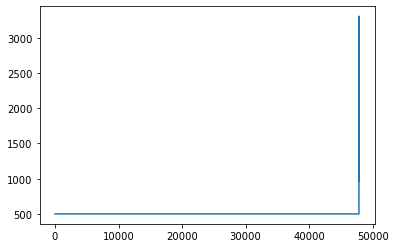

In [32]:
df_rewards[0]["sum"].plot()

<AxesSubplot:>

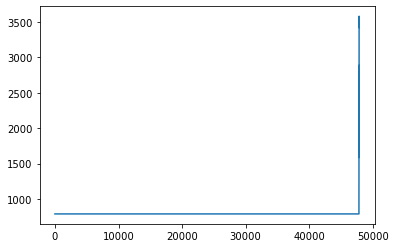

In [33]:
df_rewards[1]["sum"].plot()

<AxesSubplot:>

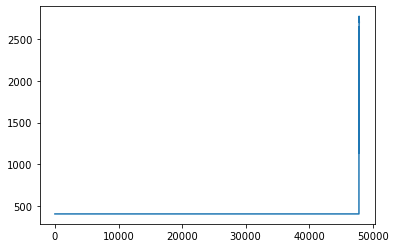

In [34]:
df_rewards[2]["sum"].plot()

<AxesSubplot:>

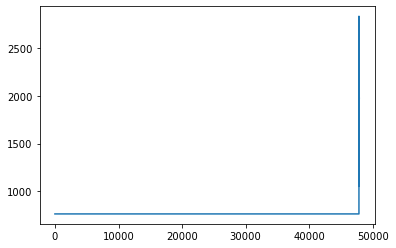

In [35]:
df_rewards[3]["sum"].plot()

<AxesSubplot:>

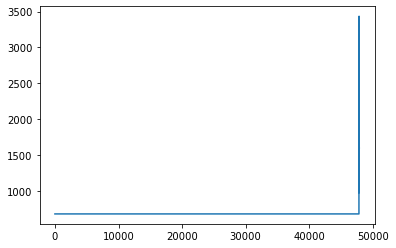

In [36]:
df_rewards[4]["sum"].plot()

In [37]:
df_observations[0].columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB', 'Flavour ', 'TSS', 'Acid',
       '%Juice', 'Bite', 'Weight', 'DMC_fruit', 'Stem_elong', 'Stem_thick',
       'Cum_trusses', 'stem_dens ', 'plant_dens'],
      dtype='object')

<AxesSubplot:>

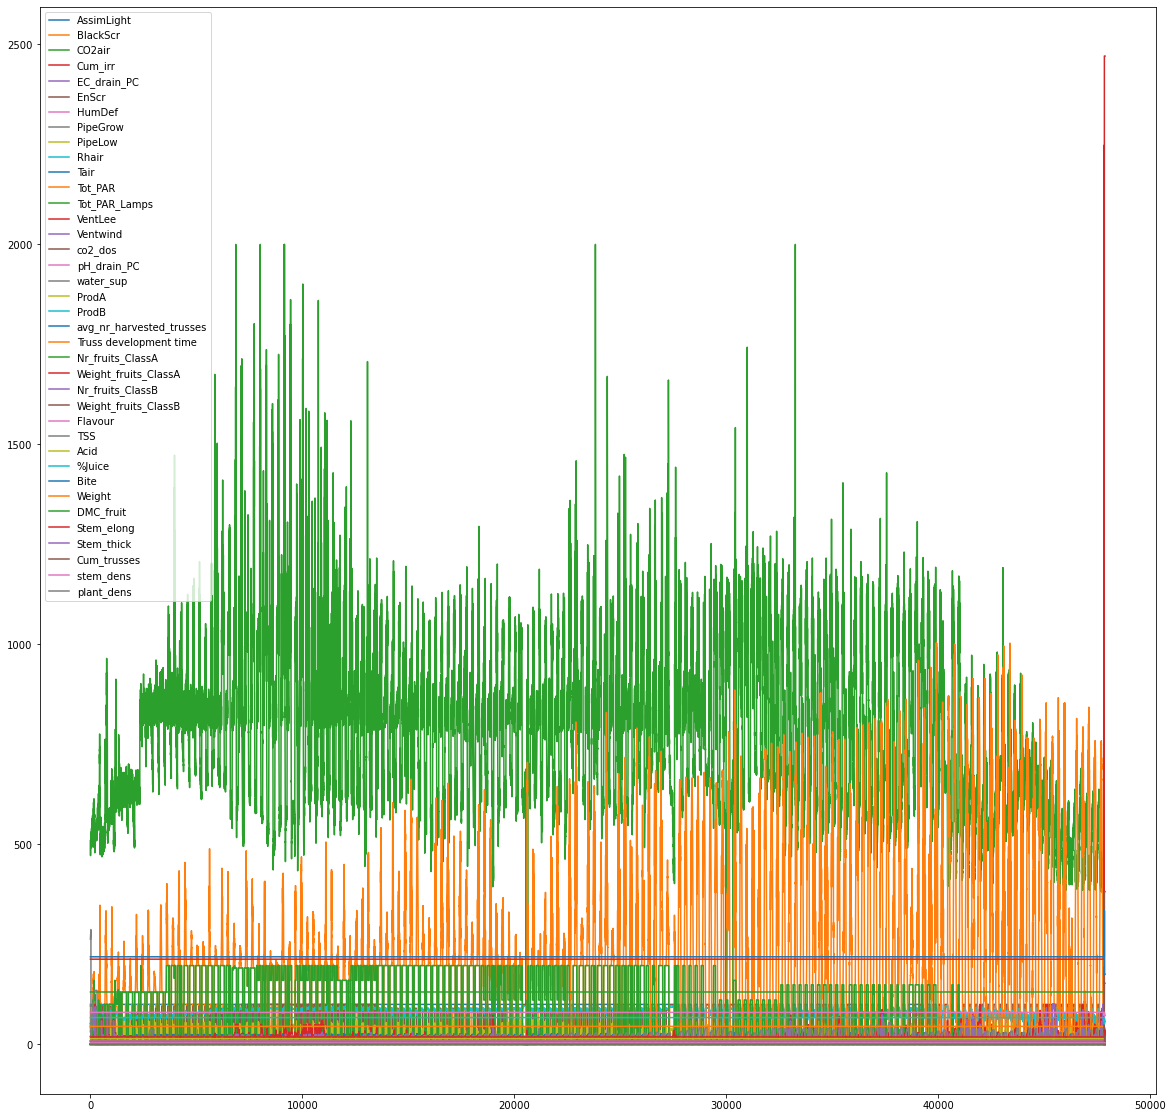

In [38]:
df_observations[1].drop("%time",axis=1).plot(figsize=(20,20))

<AxesSubplot:>

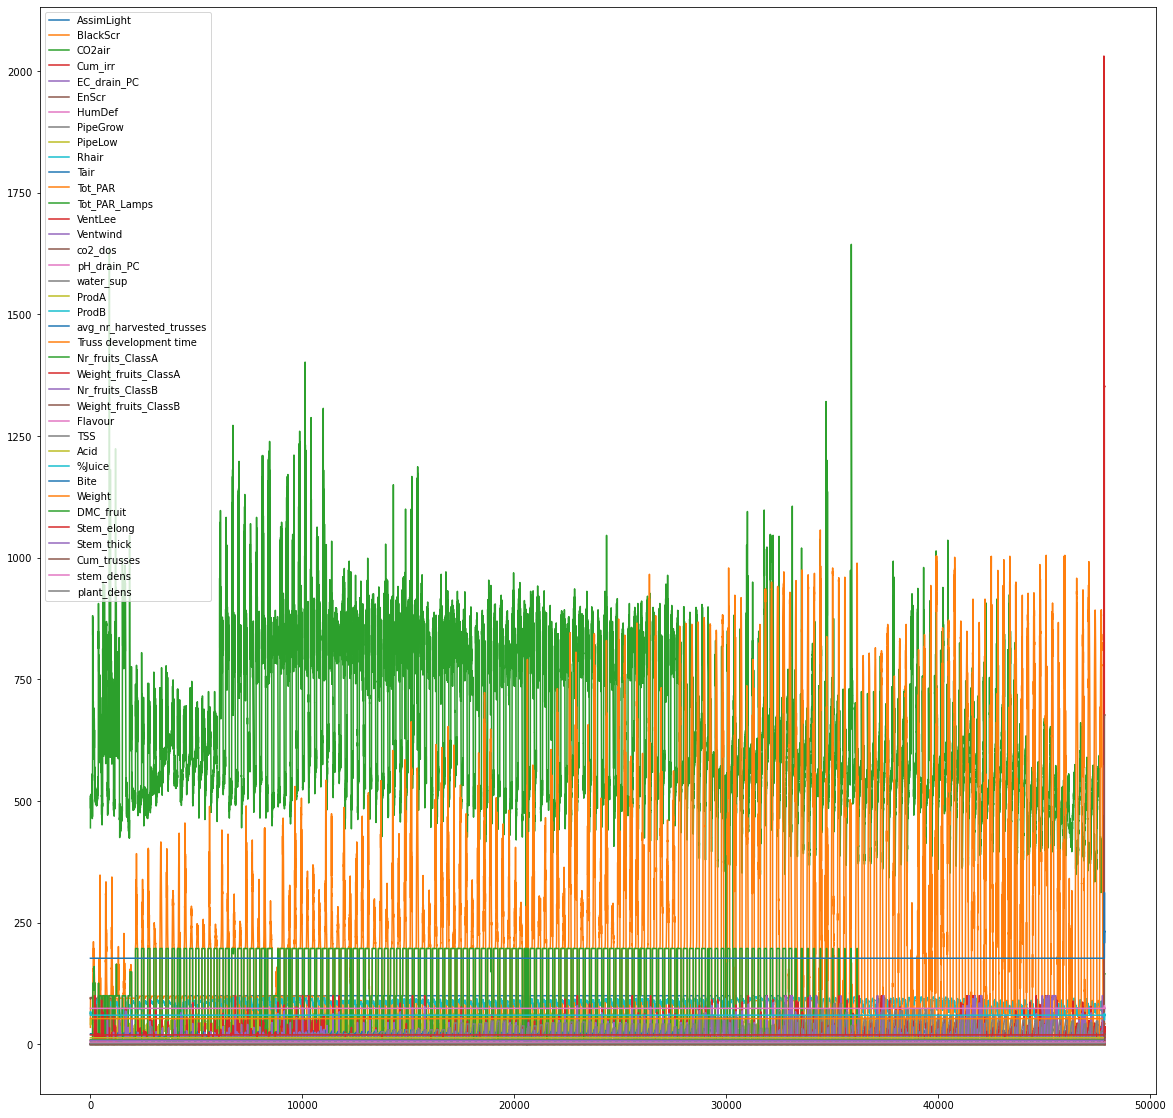

In [39]:
df_observations[2].drop("%time",axis=1).plot(figsize=(20,20))

In [92]:
df_actions[2]["assim_sp"].unique()

array([  0., 100.,  75.,  50.,  25.,  67.,  66.,  31.,  16.,  79.,  59.,
        29.,  93.,  86.,  43.], dtype=float32)

<AxesSubplot:>

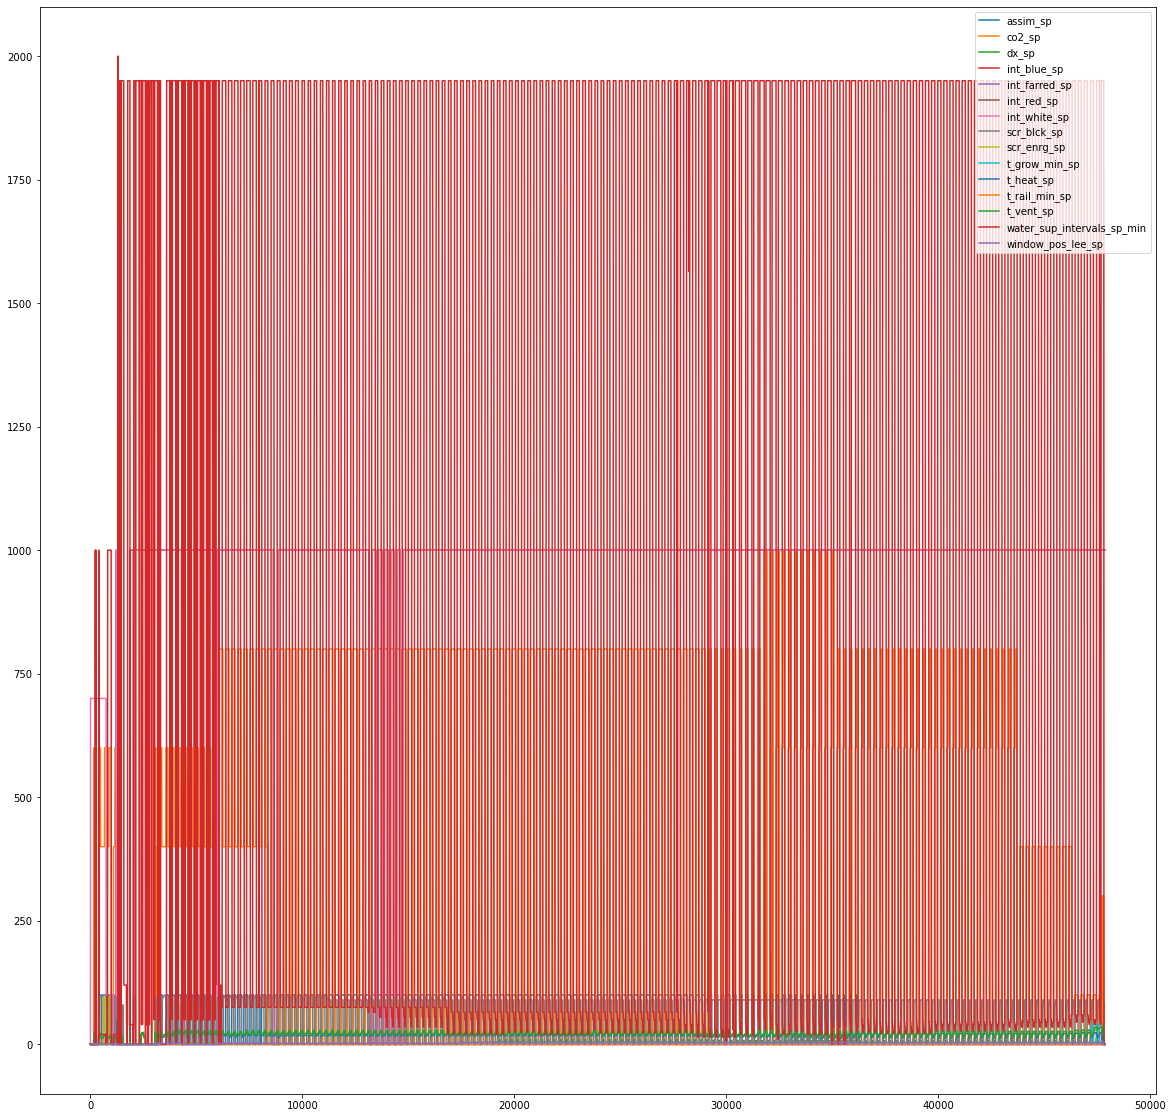

In [41]:
df_actions[2].plot(figsize=(20,20))

In [42]:
#what to save
# observations
# actions

import pickle
with open('observations.pickle', 'wb') as handle:
    pickle.dump(df_observations, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('actions.pickle', 'wb') as handle:
    pickle.dump(df_actions, handle, protocol=pickle.HIGHEST_PROTOCOL)

<AxesSubplot:>

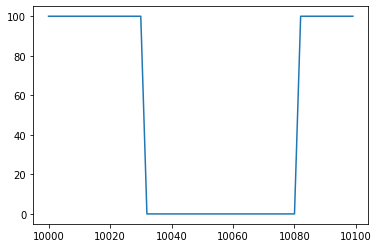

In [85]:
df_actions[0]["assim_sp"][10000:10100].plot()

## 